In [3]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.exposure import histogram


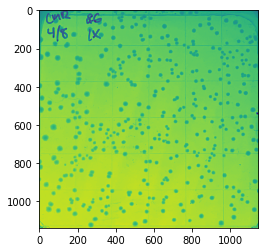

In [4]:
from skimage import color, io

img = io.imread("../data/img1.png")
img = np.asarray(img)[:, :, :3]
plate = color.rgb2gray(img)

plt.imshow(plate)


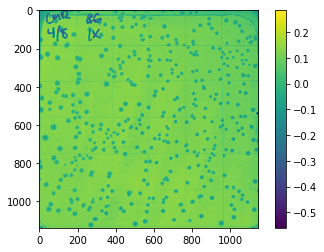

In [5]:
from skimage.filters import gaussian

sigma = 800
bkgd = gaussian(plate, sigma=sigma)

plate_flattened = plate - bkgd

def flatten(img, sigma):
    from skimage.filters import gaussian
    return img - gaussian(img, sigma=sigma)

plt.imshow(plate_flattened)
plt.colorbar()


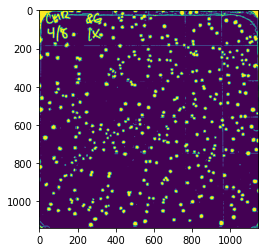

In [6]:
plt.imshow(plate_flattened < 0)


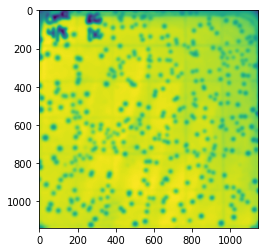

In [7]:
plt.imshow(gaussian(plate_flattened, sigma=8))


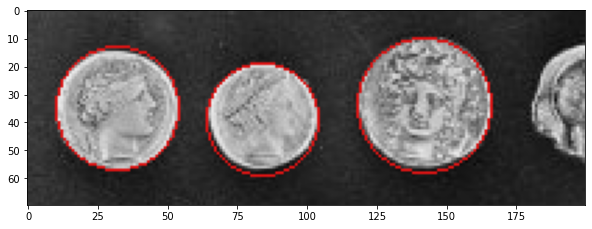

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte


# Load picture and detect edges
image = img_as_ubyte(data.coins()[160:230, 70:270])
edges = canny(image, sigma=3, low_threshold=10, high_threshold=50)


# Detect two radii
hough_radii = np.arange(20, 35, 2)
hough_res = hough_circle(edges, hough_radii)

# Select the most prominent 3 circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii, total_num_peaks=3)

# Draw them
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
image = color.gray2rgb(image)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius, shape=image.shape)
    image[circy, circx] = (220, 20, 20)

ax.imshow(image, cmap=plt.cm.gray)
plt.show()


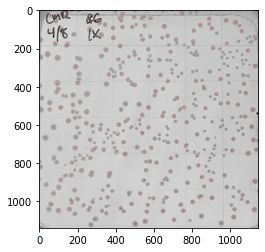

(array([0.875     , 0.828125  , 0.78125   , 0.765625  , 0.765625  ,
        0.765625  , 0.75      , 0.75      , 0.75      , 0.734375  ,
        0.703125  , 0.703125  , 0.703125  , 0.703125  , 0.6875    ,
        0.6875    , 0.6875    , 0.671875  , 0.671875  , 0.671875  ,
        0.671875  , 0.671875  , 0.72222222, 0.65625   , 0.65625   ,
        0.65625   , 0.65625   , 0.70833333, 0.640625  , 0.640625  ,
        0.640625  , 0.640625  , 0.640625  , 0.625     , 0.625     ,
        0.68055556, 0.73611111, 0.73611111, 0.609375  , 0.609375  ,
        0.609375  , 0.66666667, 0.59375   , 0.59375   , 0.59375   ,
        0.59375   , 0.59375   , 0.59375   , 0.59375   , 0.59375   ,
        0.63888889, 0.578125  , 0.578125  , 0.578125  , 0.578125  ,
        0.578125  , 0.578125  , 0.578125  , 0.578125  , 0.578125  ,
        0.578125  , 0.625     , 0.625     , 0.625     , 0.625     ,
        0.5625    , 0.5625    , 0.5625    , 0.5625    , 0.5625    ,
        0.5625    , 0.5625    , 0.5625    , 0.56

In [9]:
def find_colonies(plate_processed, desired_count=192):
    image = plate_processed

    edges = canny(image)

    hough_radii = np.arange(10, 50, 1)  # the ranges of radii to search for circles
    hough_res = hough_circle(edges, hough_radii)

    # Select the most prominent 3 circles
    accums, cx, cy, radii = hough_circle_peaks(
        hough_res,
        hough_radii,
        min_xdistance=30,
        min_ydistance=30,
        total_num_peaks=desired_count,
        normalize=True,
    )

    #print(len(accums), len(cx), len(cy), len(radii))

    # Draw them
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
    image = np.int16(
        np.interp(image, (image.min(), image.max()), (0, 255))
    )  # this rescales the image to be between 0 and 255
    cimage = color.gray2rgb(image)
    for center_y, center_x, radius in zip(cy, cx, radii):
        circy, circx = circle_perimeter(center_y, center_x, radius, shape=cimage.shape)
        cimage[circy, circx] = (220, 20, 20)

    ax.imshow(cimage)
    plt.show()
    return accums, cx, cy

find_colonies(plate_flattened)


## Warp the image

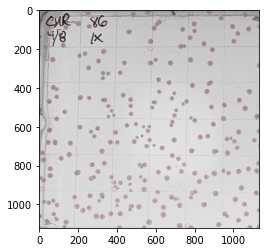

(array([0.796875  , 0.78125   , 0.734375  , 0.80555556, 0.6875    ,
        0.671875  , 0.73611111, 0.65625   , 0.640625  , 0.640625  ,
        0.625     , 0.625     , 0.75      , 0.609375  , 0.609375  ,
        0.609375  , 0.609375  , 0.66666667, 0.65277778, 0.70833333,
        0.63888889, 0.69444444, 0.69444444, 0.69444444, 0.578125  ,
        0.578125  , 0.625     , 0.625     , 0.625     , 0.625     ,
        0.5625    , 0.5625    , 0.5625    , 0.5625    , 0.5625    ,
        0.5625    , 0.61111111, 0.61111111, 0.61111111, 0.66666667,
        0.546875  , 0.546875  , 0.65277778, 0.59722222, 0.63888889,
        0.63888889, 0.63888889, 0.63888889, 0.53125   , 0.53125   ,
        0.53125   , 0.53125   , 0.53125   , 0.53125   , 0.53125   ,
        0.53125   , 0.53125   , 0.53125   , 0.53125   , 0.58333333,
        0.58333333, 0.56944444, 0.56944444, 0.515625  , 0.515625  ,
        0.515625  , 0.515625  , 0.515625  , 0.515625  , 0.515625  ,
        0.61111111, 0.55555556, 0.55555556, 0.5 

In [10]:
img = io.imread("../data/img2.png")
img = np.asarray(img)[:, :, :3]
plate = color.rgb2gray(img)

find_colonies(
    flatten(plate, 800)
)

This seems to work well. Now we need to account for the angle of the picture, and making sure that we can reference the image correctly.

```python
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage import transform

area_of_interest = [(500, 600),
                    (3220, 1950),
                    (3220, 2435),
                    (500, 3100)]
area_of_projection = [(100, 1000),
                      (3400, 1000),
                      (3400, 2600),
                      (100, 2600)]

def project_transform(image, src, dst):
    x_dst = [val[0] for val in dst] + [dst[0][0]]
    y_dst = [val[1] for val in dst] + [dst[0][1]]
    
    tform = transform.estimate_transform('projective', 
                                         np.array(src), 
                                         np.array(dst))
    transformed = transform.warp(image, tform.inverse)
    
    plt.figure(figsize=(6,6))
    plt.imshow(transformed)
    plt.plot(x_dst, y_dst, 'r--')
project_transform(palawan, area_of_interest, area_of_projection)
```

[(150, 150), (998, 150), (150, 989), (998, 989)]


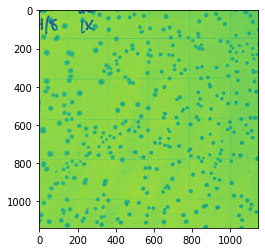

In [19]:
from skimage import transform
import numpy as np

area_of_interest = [
    (196,186),
    (954,188),
    (190,940),
    (962,942),
]

target = (150,150)
imdims = (1148,1139)

area_of_projection = [
    target,
    (imdims[0]-target[0], target[1]),
    (target[0], imdims[1]-target[1]),
    (imdims[0]-target[0], imdims[1]-target[1])
]

for_transform = transform.estimate_transform('projective', np.array(area_of_interest), np.array(area_of_projection))
transformed = transform.warp(plate_flattened, for_transform.inverse)

print(area_of_projection)
plt.imshow(transformed)

In [25]:
def warp(img, initial_coords, final_coords):
    """
    initial and final coords are a list of tuples with x and y values.
    """
    from skimage import transform
    import numpy as np

    for_transform = transform.estimate_transform('projective', np.array(initial_coords), np.array(final_coords))
    transformed = transform.warp(img, for_transform.inverse)

    return transformed

def warp_squareplate(img, initial_coords):
    """
    Calculate final coords based on small plate dimensions. Incorporate a crop to get rid of the plate edges.
    """
    target = (150,150)
    imdims = (img.shape[1], img.shape[0])

    final_coords = [
        target,
        (imdims[0]-target[0], target[1]),
        (target[0], imdims[1]-target[1]),
        (imdims[0]-target[0], imdims[1]-target[1])
    ]

    return warp(img, initial_coords, final_coords)

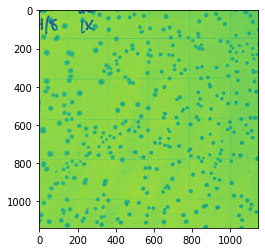

In [27]:
plt.imshow(warp_squareplate(plate_flattened, 
[
    (196,186),
    (954,188),
    (190,940),
    (962,942),
]))

## Now put it in a file

In [8]:
%%writefile ../colony_picker/cl-picker.py
import argparse
import pandas as pd
import pathlib
import numpy as np
from skimage import color, io
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte
import matplotlib.pyplot as plt

def warp(img, initial_coords, final_coords):
    """
    initial and final coords are a list of tuples with x and y values.
    """
    from skimage import transform
    import numpy as np

    for_transform = transform.estimate_transform('projective', np.array(initial_coords), np.array(final_coords))
    transformed = transform.warp(img, for_transform.inverse)

    return transformed

def warp_squareplate(img, initial_coords, target=(150,150)):
    """
    Calculate final coords based on small plate dimensions. Incorporate a crop to get rid of the plate edges.
    """
    imdims = (img.shape[1], img.shape[0])

    final_coords = [
        target,
        (imdims[0]-target[0], target[1]),
        (target[0], imdims[1]-target[1]),
        (imdims[0]-target[0], imdims[1]-target[1])
    ]

    return warp(img, initial_coords, final_coords)

def flatten(img, sigma):
    from skimage.filters import gaussian
    return img - gaussian(img, sigma=sigma)

def find_colonies(plate_processed, desired_count=192):
    image = plate_processed

    edges = canny(image)

    hough_radii = np.arange(10, 50, 1)  # the ranges of radii to search for circles
    hough_res = hough_circle(edges, hough_radii)

    # Select the most prominent 3 circles
    accums, cx, cy, radii = hough_circle_peaks(
        hough_res,
        hough_radii,
        min_xdistance=30,
        min_ydistance=30,
        total_num_peaks=desired_count,
        normalize=True,
    )

    #print(len(accums), len(cx), len(cy), len(radii))

    # Draw them
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
    image = np.int16(
        np.interp(image, (image.min(), image.max()), (0, 255))
    )  # this rescales the image to be between 0 and 255
    cimage = color.gray2rgb(image)
    for center_y, center_x, radius in zip(cy, cx, radii):
        circy, circx = circle_perimeter(center_y, center_x, radius, shape=cimage.shape)
        cimage[circy, circx] = (220, 20, 20)

    ax.imshow(cimage)
    plt.show()
    return accums, cx, cy

def main():

    parser = argparse.ArgumentParser(
        description="""
        Takes image and plate coordinates as input. Outputs locations of colonies relative to the upper left coordinate given.
        """
    )

    parser.add_argument(
        "imagepath", type=str, help="Path to the image file."
    )
    parser.add_argument(
        "coord 1x",
        type=int,
        help="Upper left corner coordinate.",
    )
    parser.add_argument(
        "coord 1y",
        type=int,
        help="Upper left corner coordinate.",
    )
    parser.add_argument(
        "coord 2x",
        type=int,
        help="Upper right corner coordinate.",
    )
    parser.add_argument(
        "coord 2y",
        type=int,
        help="Upper right corner coordinate.",
    )
    parser.add_argument(
        "coord 3x",
        type=int,
        help="Lower left corner coordinate.",
    )
    parser.add_argument(
        "coord 3y",
        type=int,
        help="Lower left corner coordinate.",
    )
    parser.add_argument(
        "coord 4x",
        type=int,
        help="Lower right corner coordinate.",
    )
    parser.add_argument(
        "coord 4y",
        type=int,
        help="Lower right corner coordinate.",
    )
    parser.add_argument(
        "num colonies",
        type=int,
        help="Number of colonies I should find.",
    )
    parser.add_argument(
        "--targetx",
        type=int,
        default=150,
        help="Target x location for upper left cross of plate.",
    )
    parser.add_argument(
        "--targety",
        type=int,
        default=150,
        help="Target y location for upper left cross of plate.",
    )
    parser.add_argument(
        "--targetwidth",
        type=float,
        default=40,
        help="Distance between the top two target points in millimeters to allow conversion of units.",
    )
    

    args = vars(parser.parse_args())
    path = pathlib.Path(args['imagepath'])

    img = io.imread(path)
    img = np.asarray(img)[:, :, :3]
    plate = color.rgb2gray(img)
    flattened = flatten(plate, 800)
    warped = warp_squareplate(
        flattened, 
        [
            (args['coord 1x'], args['coord 1y']),
            (args['coord 2x'], args['coord 2y']),
            (args['coord 3x'], args['coord 3y']),
            (args['coord 4x'], args['coord 4y']),
        ],
        target=(args['targetx'], args['targety'])
        )

    accums, cx, cy = find_colonies(
        warped,
        args["num colonies"]
    )

    df = pd.DataFrame(
        {
            'x coord':cx,
            'y coord':cy,
            'quality':accums,
        }
    )
    mm_conversion_factor = args['targetwidth'] / (warped.shape[1] - (2*args['targetx']))
    df['x coord'] = df['x coord'].copy() - args['targetx']
    df['y coord'] = df['y coord'].copy() - args['targety']
    df['x mm'] = df['x coord']*mm_conversion_factor
    df['y mm'] = df['y coord']*mm_conversion_factor

    print("Writing to ", path.with_suffix('.csv'))

    df.to_csv(path.with_suffix('.csv'))

if __name__ == "__main__":
    exit(main())

Overwriting ../colony_picker/cl-picker.py


This is working. Probably will be more effective as a GUI that can allow adjustment of params in real time. But for now this will work.